# Convolutional Neural Network (CNN) with Tensorflow

## Getting the data (FOOD DATA)

In [1]:
# getting data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# download unzip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-04-16 10:28:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.207, 108.177.121.207, 142.250.1.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   266MB/s    in 0.4s    

2024-04-16 10:28:05 (266 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
import os

# list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in `{dirpath}`")

There are 2 directories and 0 images in `pizza_steak`
There are 2 directories and 0 images in `pizza_steak/train`
There are 0 directories and 750 images in `pizza_steak/train/pizza`
There are 0 directories and 750 images in `pizza_steak/train/steak`
There are 2 directories and 0 images in `pizza_steak/test`
There are 0 directories and 250 images in `pizza_steak/test/pizza`
There are 0 directories and 250 images in `pizza_steak/test/steak`


In [5]:
# visualize images
import matplotlib.pyplot as plt
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")

class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # create a list of class names from sub directory in train folder
class_names

array(['pizza', 'steak'], dtype='<U5')

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setup the target directory
  target_folder = target_dir+target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # reading the image and plotting in matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])

  # plot the image
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Image shape: {img.shape}")

  return img

Image shape: (512, 512, 3)


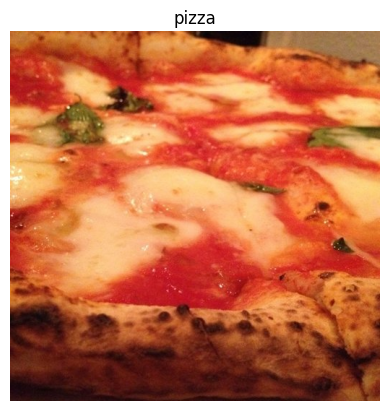

In [7]:
img = view_random_image("pizza_steak/train/", "pizza")

In [8]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[186,  97,  37],
        [188,  99,  39],
        [185, 100,  36],
        ...,
        [165, 122,  79],
        [163, 120,  78],
        [164, 121,  79]],

       [[196, 107,  47],
        [196, 110,  49],
        [194, 109,  45],
        ...,
        [167, 124,  81],
        [167, 124,  82],
        [169, 126,  84]],

       [[192, 106,  45],
        [196, 110,  49],
        [196, 110,  49],
        ...,
        [167, 124,  81],
        [168, 125,  83],
        [169, 126,  84]],

       ...,

       [[ 50,  22,  19],
        [ 49,  21,  18],
        [ 48,  20,  19],
        ...,
        [143,  69,  34],
        [139,  65,  30],
        [131,  58,  23]],

       [[ 54,  24,  22],
        [ 52,  22,  20],
        [ 50,  20,  18],
        ...,
        [146,  72,  35],
        [139,  65,  28],
        [137,  63,  26]],

       [[ 55,  25,  23],
        [ 53,  23,  21],
        [ 51,  21,  19],
        ...,
        [152,  76,  4

# Building an End to End CNN

* Load images
* Preprocess our images
* Build CNN to find patterns in our images
* Compile our CNN
* Fit the CNN in our training data

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess the data ( get all the pixel values between 0 and 1 )
train_datagen = ImageDataGenerator(rescale = 1./255) # generate batches of tensor data with real time augmentation
valid_datagen = ImageDataGenerator(rescale = 1./255)

# setup paths to our data directory
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# import the data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir, batch_size = 32, target_size =(224, 224), class_mode = "binary", seed = 42)
test_data = valid_datagen.flow_from_directory(directory = test_dir, batch_size = 32, target_size =(224,224), class_mode = "binary", seed = 42)

# Build a CNN Model ( same as Tiny VGG on the CNN explainer website )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [10]:
len(train_data) # 1500 images / 32 per batch = 46.87

47

# Model_1

In [11]:
# Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),

    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = "valid"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model
model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 162ms/step - loss: 0.5804 - accuracy: 0.6627 - val_loss: 0.3951 - val_accuracy: 0.8380
Epoch 2/5
47/47 [==============================] - 6s 129ms/step - loss: 0.4434 - accuracy: 0.8107 - val_loss: 0.3637 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 6s 128ms/step - loss: 0.4196 - accuracy: 0.8153 - val_loss: 0.3644 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 5s 116ms/step - loss: 0.3831 - accuracy: 0.8287 - val_loss: 0.3606 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 6s 132ms/step - loss: 0.3387 - accuracy: 0.8633 - val_loss: 0.3437 - val_accuracy: 0.8480


### Go to CNN EXPLAINER website

In [12]:
# model

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

# Build ANN for the same dataset

In [13]:
# random seed
tf.random.set_seed(42)

# 1. Create a model
ANN_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# 2. Compile the model
ANN_model.compile(
    loss = "BinaryCrossentropy",
    optimizer = "Adam",
    metrics = ["accuracy"]
)

history_ann = ANN_model.fit(train_data,
                            epochs = 5,
                            steps_per_epoch = len(train_data),
                            validation_data = test_data,
                            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 7s 113ms/step - loss: 0.8937 - accuracy: 0.5153 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 111ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 122ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 105ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 119ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [16]:
ANN_model.summary(), model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #  

(None, None)

# Improving model
> Despite having 20 times more parameters in our second model, performance is terrible
> Try improving the second model

In [19]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(), # (224, 224, 3)
    tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

history_3 = model_3.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data),
            )

Epoch 1/5
47/47 [==============================] - 7s 108ms/step - loss: 2.5787 - accuracy: 0.6300 - val_loss: 0.9977 - val_accuracy: 0.6940
Epoch 2/5
47/47 [==============================] - 6s 139ms/step - loss: 0.7717 - accuracy: 0.7107 - val_loss: 0.4476 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 5s 106ms/step - loss: 0.9244 - accuracy: 0.6860 - val_loss: 0.5756 - val_accuracy: 0.7800
Epoch 4/5
47/47 [==============================] - 6s 133ms/step - loss: 0.6405 - accuracy: 0.7447 - val_loss: 0.4851 - val_accuracy: 0.7680
Epoch 5/5
47/47 [==============================] - 5s 111ms/step - loss: 0.4783 - accuracy: 0.7847 - val_loss: 0.4338 - val_accuracy: 0.8020


In [20]:
model_3.summary() # this has over 15 million parameters no way! but performs no way near our CNN model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, None)              0         
                                                                 
 dense_8 (Dense)             (None, 100)               15052900  
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Binary Classification: Breaking down

## Visualizing the data

Image shape: (307, 512, 3)
Image shape: (512, 384, 3)


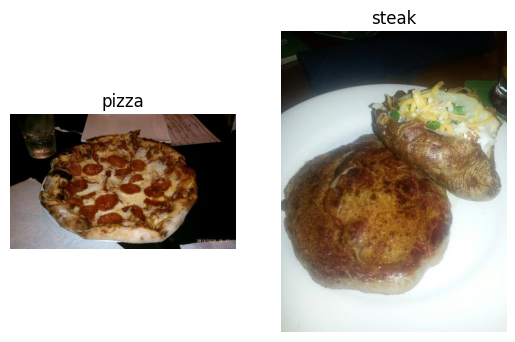

In [23]:
plt.figure()

plt.subplot(1,2,1)
img1 = view_random_image("pizza_steak/train/", "pizza")

plt.subplot(1,2,2)
img2 = view_random_image("pizza_steak/train/", "steak")


## Preprocess the data

In [25]:
# Define the directory dataset path
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Batch is a small dataset which our model look at them rather than looking all the images at one time

# create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [30]:
# laod our data from the directories

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               batch_size = 32)
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224, 224),
                                             class_mode = "binary",
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [32]:
images, labels = train_data.next() # get the next batch of images labels in train data
len(images), len(labels)

(32, 32)

In [34]:
# How many batches are there
len(train_data) # 1500 / 32

47

In [35]:
# get the first two images
images[:2], images[0].shape

(array([[[[0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098],
          ...,
          [0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098]],
 
         [[0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098],
          ...,
          [0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098]],
 
         [[0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098],
          ...,
          [0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098]],
 
         ...,
 
         [[0.6392157 , 0.6       , 0.6039216 ],
          [0.62745

## Create a CNN Model
(papers with code)[https://paperswithcode.com/]

In [38]:
# set seed
tf.random.set_seed(42)

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential

model_4 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides = 1,
           padding = "valid",
           activation = "relu",
           input_shape = (224, 224, 3)),
    Conv2D(filters = 10,
           kernel_size = 3,
           activation = "relu"),
    Conv2D(filters = 10,
           kernel_size = 3, activation = "relu"),
    Flatten(),
    Dense(1, activation = tf.keras.activations.sigmoid)
])

model_4.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = Adam(),
    metrics = ['accuracy']
)

history_4 = model_4.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
47/47 [==============================] - 8s 142ms/step - loss: 1.6954 - accuracy: 0.6260 - val_loss: 0.5630 - val_accuracy: 0.7200
Epoch 2/5
47/47 [==============================] - 6s 120ms/step - loss: 0.5060 - accuracy: 0.7627 - val_loss: 0.4329 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 6s 134ms/step - loss: 0.3364 - accuracy: 0.8633 - val_loss: 0.3889 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 6s 124ms/step - loss: 0.1522 - accuracy: 0.9573 - val_loss: 0.4816 - val_accuracy: 0.8040
Epoch 5/5
47/47 [==============================] - 6s 133ms/step - loss: 0.0467 - accuracy: 0.9927 - val_loss: 0.5749 - val_accuracy: 0.7860


In [39]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_8 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_9 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_6 (Flatten)         (None, 475240)            0         
                                                                 
 dense_13 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Evaluating our model

<Axes: >

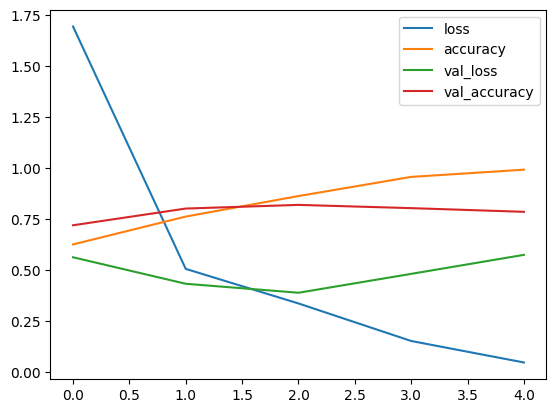

In [40]:
import pandas as pd
pd.DataFrame(history_4.history).plot()

In [50]:
# plot the validation and training curve separately

def plot_loss_curves(history):
  loss = history_4.history["loss"]
  val_loss = history_4.history["val_loss"]

  accuracy = history_4.history["accuracy"]
  val_accuracy = history_4.history["val_accuracy"]

  epochs = range(len(history_4.history["loss"]))

  # plot loss
  plt.plot(epochs, loss, label = "training loss")
  plt.plot(epochs, val_loss, label = "val_loss")

  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "accuracy loss")
  plt.plot(epochs, val_accuracy, label = "val_acc")

  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

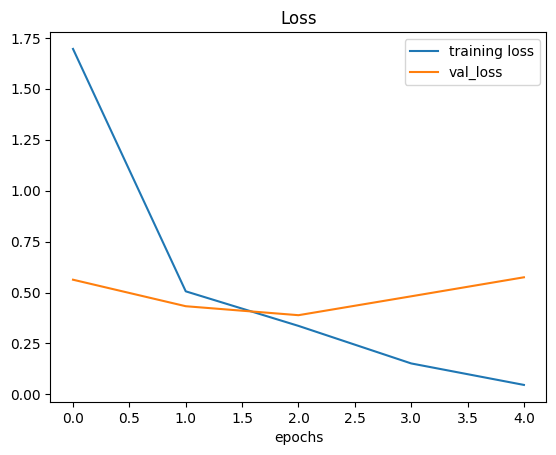

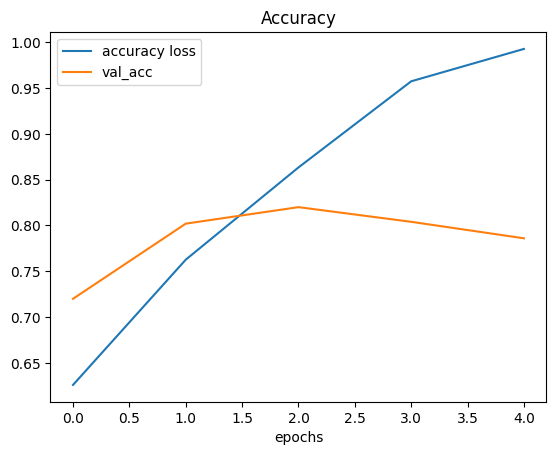

In [43]:
plot_loss_curves(history_4)

> When a model validation loss starts to increase , it is likely that our model is overfitting the training dataset. This means it is learning the training dataset too well but the model's ability to unseen data is diminished. it is overfitting.

## Adjust the model's parameters

1. Create a baseline
2. Beat the baseline by by overfitting a larger model
3. Reduce Overfitting

> Ways to induce overfitting
1. Increase the numbers of Conv Layers
2. Increase the numbers of Filters
3. Add another dense layer to the output of the Flatten layer

> Reduce Overfitting
1. Add data augmentation
2. Add regularization layers ( such as MaxPool2D )
3. Add more data

# New Baseline Model

In [45]:
# create the model ( our new base line )
model_5 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

# compile the model
model_5.compile(
    loss = "BinaryCrossentropy",
    optimizer = "Adam",
    metrics = ["accuracy"]
)

# fit the model
history_5 = model_5.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
47/47 [==============================] - 8s 125ms/step - loss: 0.7087 - accuracy: 0.5767 - val_loss: 0.6265 - val_accuracy: 0.7400
Epoch 2/5
47/47 [==============================] - 6s 118ms/step - loss: 0.5550 - accuracy: 0.7540 - val_loss: 0.4544 - val_accuracy: 0.7940
Epoch 3/5
47/47 [==============================] - 6s 127ms/step - loss: 0.4675 - accuracy: 0.7907 - val_loss: 0.3807 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 6s 133ms/step - loss: 0.4419 - accuracy: 0.8093 - val_loss: 0.3786 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 5s 112ms/step - loss: 0.4174 - accuracy: 0.8187 - val_loss: 0.3704 - val_accuracy: 0.8540


In [56]:
# plot the loss and accuracy curve
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 26, 26, 10)       

<Axes: >

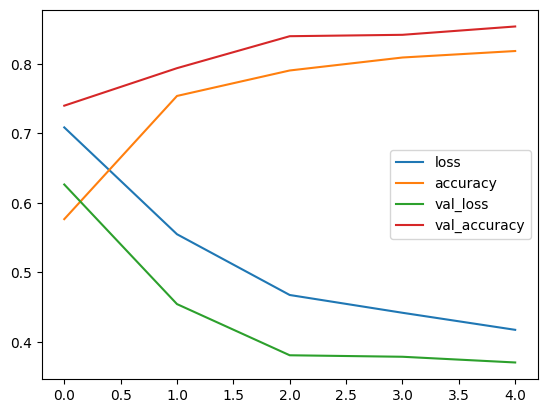

In [57]:
pd.DataFrame(history_5.history).plot()

# Data Augmentation

In [60]:
# create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale = 1./255,
                                              rotation_range = 0.2,
                                              shear_range = 0.2,
                                              zoom_range = 0.2,
                                              width_shift_range = 0.2,
                                              height_shift_range = 0.3,
                                              horizontal_flip = True)

# create ImageDataGenerator without data augmentation

train_datagen = ImageDataGenerator(
    rescale = 1./255
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

## visualizing our augmented data
> Only performed on train data

In [64]:
train_data_augmented = train_datagen_augmented.flow_from_directory(
    directory = train_dir,
    target_size = (224, 224),
    class_mode = "binary",
    shuffle = False
)

# creat non augmented train data batches
train_data = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (224, 224),
    class_mode = "binary",
    shuffle = False
)

# create non augmented test data batches
test_data = test_datagen.flow_from_directory(
    directory = test_dir,
    target_size = (224, 224),
    class_mode = "binary",
    shuffle = False
)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [65]:
# get some sample augmented data batches
images, labels = train_data.next()
aug_images, aug_labels = train_data_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

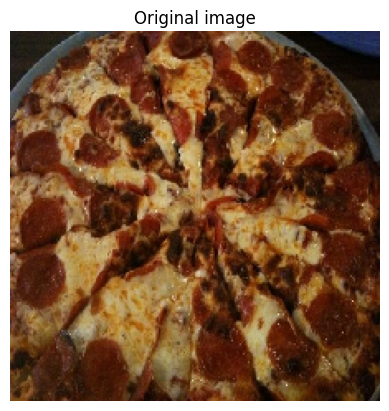

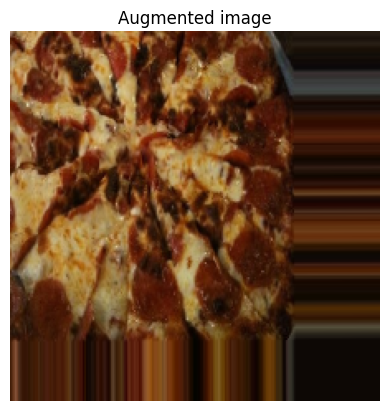

In [74]:
# visualize the image
import random
random_number = random.randint(0, 32)

plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.figure()
plt.imshow(aug_images[random_number])
plt.title("Augmented image")
plt.axis(False)

## Training model on augmented data

In [75]:
# Create a model
model_6 = Sequential(
    [
        Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
        MaxPool2D(pool_size = 2),
        Conv2D(10, 3, activation = "relu"),
        MaxPool2D(pool_size = 2),
        Conv2D(10, 3, activation = 'relu'),
        MaxPool2D(pool_size = 2),
        Flatten(),
        Dense(1, activation = "sigmoid")
    ]
)

# Compile the model
model_6.compile(
    loss = "BinaryCrossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

# Fit the model
history_6 = model_6.fit(
    train_data_augmented,
    epochs = 5,
    steps_per_epoch = len(train_data_augmented),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
47/47 [==============================] - 22s 448ms/step - loss: 0.8595 - accuracy: 0.4560 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 20s 431ms/step - loss: 0.6921 - accuracy: 0.5000 - val_loss: 0.6838 - val_accuracy: 0.5020
Epoch 3/5
47/47 [==============================] - 22s 464ms/step - loss: 0.6801 - accuracy: 0.5700 - val_loss: 0.6375 - val_accuracy: 0.7600
Epoch 4/5
47/47 [==============================] - 21s 455ms/step - loss: 0.6574 - accuracy: 0.7047 - val_loss: 0.6301 - val_accuracy: 0.5840
Epoch 5/5
47/47 [==============================] - 21s 443ms/step - loss: 0.6637 - accuracy: 0.5967 - val_loss: 0.6721 - val_accuracy: 0.5420


<Axes: >

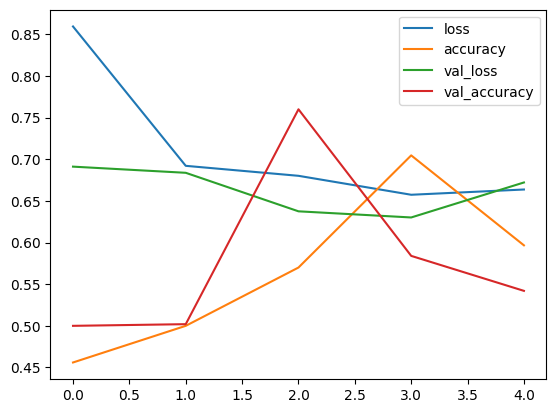

In [76]:
pd.DataFrame(history_6.history).plot()

# Augmentation with data shuffle

In [78]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(
    directory = train_dir,
    target_size = (224, 224),
    class_mode = "binary",
    batch_size = 32,
    shuffle = True
)

Found 1500 images belonging to 2 classes.


## Create Model for shuffle data

In [81]:
model_7 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(pool_size= 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(1, activation = "sigmoid")
])
model_7.compile(
    loss = "BinaryCrossentropy",
    optimizer = Adam(),
    metrics = ['accuracy']
)
history_7 = model_7.fit(
    train_data_augmented_shuffled,
    epochs = 5,
    steps_per_epoch = len(train_data_augmented_shuffled),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
47/47 [==============================] - 22s 438ms/step - loss: 0.6708 - accuracy: 0.5800 - val_loss: 0.5771 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 22s 454ms/step - loss: 0.5508 - accuracy: 0.7320 - val_loss: 0.3940 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 23s 493ms/step - loss: 0.5195 - accuracy: 0.7500 - val_loss: 0.4299 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 20s 428ms/step - loss: 0.4921 - accuracy: 0.7627 - val_loss: 0.3989 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 21s 437ms/step - loss: 0.4697 - accuracy: 0.7753 - val_loss: 0.3394 - val_accuracy: 0.8580


<Axes: >

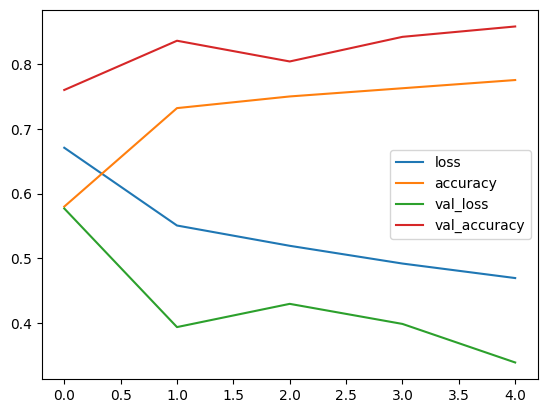

In [82]:
pd.DataFrame(history_7.history).plot()

# Exploring options to improve our model

* Increase the model layers
* Increase filters
* Train longer
* Find an ideal learning rate
* Get more data
* Use **Transfer Learning**


# Predict on our custom data

## Preprocess

In [94]:
image = mpimg.imread("/content/pizza_steak/test/pizza/1001116.jpg")

In [99]:
def pre_process(image, image_shape = 224):
  # read the image
  img = tf.io.read_file(image)

  # decode the read file into a tensor
  img = tf.image.decode_image(img)

  # resize the image
  img = tf.image.resize(img, size = [image_shape, image_shape])

  # rescale the image
  img = img / 255.

  return img

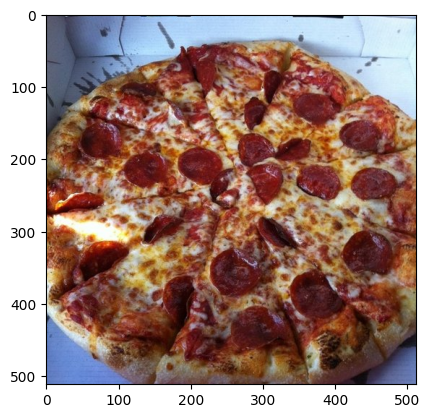

In [100]:
plt.imshow(image)

In [103]:
image_path = "/content/pizza_steak/test/pizza/1001116.jpg"
processed_image = pre_process(image_path)

In [104]:
model_7.predict(tf.expand_dims(processed_image, axis = 0))

1/1 [==============================] - 0s 310ms/step


array([[0.18085921]], dtype=float32)

In [2]:
class_names = ['pizza', 'steak']

In [ ]:
import tensorflow as tf
pred_class = class_names[tf.round(model_7.predict(tf.expand_dims(processed_image, axis = 0)))]